# CORPO DO CÓDIGO

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex as re
import numpy as np
import time

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

In [12]:
def extract_sizes_and_quantities(description):
    """
    Extract sizes and quantities of shirts from a description of the order.

    Parameters:
        description (str): Description of the order containing shirt sizes and quantities.

    Returns:
        dict: A dictionary containing the sizes as keys and their respective quantities as values.
    """
    pattern = r"(?i)\b(\d+)\s*(NP|NM|NGG?|NEXG|BLP|BLM|BLGG?|BLEXG|INFANTIL\s*-\s*\d+\s*ANOS)\b"
    matches = re.findall(pattern, description)
    sizes_quantities = {size.upper(): int(quantity) for quantity, size in matches}
    return sizes_quantities

def check_empty_orders(file_path, model):
    """
    Check for empty orders in the data provided in an Excel file and generate a list of them.

    Parameters:
        file_path (str): The file path of the Excel file containing the data.
        model (str): The model of the shirts, either 'NORMAIS' (regular) or 'POLOS' (polo shirts).

    Returns:
        None
    """
    if model == 'NORMAIS':
        df = pd.read_excel(file_path, sheet_name="NORMAIS")
    elif model == 'POLOS':
        df = pd.read_excel(file_path, sheet_name="POLOS")

    empty_orders = []

    # Process each row in the DataFrame
    for index, row in df.iterrows():
        description = row["DESCRIÇÃO DO PEDIDO"]

        if pd.isna(description) or not description.strip():
            pessoa_value = row["PESSOA"]
            empty_orders.append((index, pessoa_value))

        # Stop the verification when reaching line 111
        if index == 110:
            break

    # Display the list of empty orders
    print("Pedidos faltantes:")
    for row_index, pessoa_value in empty_orders:
        print(f"Linha {row_index + 2}: {pessoa_value}")
    print("TOTAL:", len(empty_orders))

def calculate_shirt_sizes(file_path, model):
    """
    Calculate the quantities of different shirt sizes based on the data provided in an Excel file.

    Parameters:
        file_path (str): The file path of the Excel file containing the shirt size data.
        model (str): The model of the shirts, either 'NORMAIS' (regular) or 'POLOS' (polo shirts).

    Returns:
        dict: A dictionary containing the quantities of different shirt sizes. The keys represent the shirt sizes,
              and the values represent the total quantity of each shirt size found in the data. The possible shirt
              size keys are: "BLP" (Baby Look Pequeno), "BLM" (Baby Look Médio), "BLG" (Baby Look Grande),
              "BLGG" (Baby Look Extra Grande), "BLEXG" (Baby Look Extra Extra Grande),
              "NP" (Masculina Pequena), "NM" (Masculina Média), "NG" (Masculina Grande),
              "NGG" (Masculina Extra Grande), "NEXG" (Masculina Extra Extra Grande), and "INFANTIL" (Infantil).
    """
    if model == 'NORMAIS':
        df = pd.read_excel(file_path, sheet_name="NORMAIS")
    elif model == 'POLOS':
        df = pd.read_excel(file_path, sheet_name="POLOS")

    sizes_quantities = {
        "BLP": 0,
        "BLM": 0,
        "BLG": 0,
        "BLGG": 0,
        "BLEXG": 0,
        "NP": 0,
        "NM": 0,
        "NG": 0,
        "NGG": 0,
        "NEXG": 0,
        "INFANTIL": 0,
    }

    # Process each row in the DataFrame and sum the quantities of each shirt size
    for index, row in df.iterrows():
        description = row["DESCRIÇÃO DO PEDIDO"]
        sizes_quantities_description = extract_sizes_and_quantities(str(description))

        for size, quantity in sizes_quantities_description.items():
            if "INFANTIL" in size:
                sizes_quantities["INFANTIL"] += quantity
            else:
                sizes_quantities[size] += quantity

    return sizes_quantities

def get_total_shirts(calculated_sizes):
    """
    Print the quantities of each shirt size and calculate the total number of shirts.

    Parameters:
        calculated_sizes (dict): A dictionary containing the total quantities of each shirt size.

    Returns:
        int: The total number of shirts.
    """
    total_shirts = 0

    for size, quantity in calculated_sizes.items():
        print(f"{size}: {quantity}")
        total_shirts += quantity

    print('TOTAL:', total_shirts)
    return total_shirts

def plot_shirt_histogram(sizes_quantities, model):
    """
    Plot a bar chart to visualize the distribution of shirt sizes.

    Parameters:
        sizes_quantities (dict): A dictionary containing the quantities of each shirt size.
                                 The keys represent the shirt sizes, and the values represent
                                 the total quantity of each shirt size.
        model (str): The model of the shirts, either 'NORMAIS' (regular) or 'POLOS' (polo shirts).

    Returns:
        None
    """
    plt.figure(figsize=(14, 6))
    sns.barplot(x=list(sizes_quantities.keys()), y=list(sizes_quantities.values()))
    plt.xlabel('Shirt Size', fontsize=14)
    plt.ylabel('Quantity', fontsize=14)
    plt.suptitle('Shirt Sizes Distribution', fontsize=20)
    plt.title(f'{model}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.savefig(model + '.pdf')
    plt.show()


# NORMAIS

In [13]:
start_time = time.time()

# Example usage to calculate all shirt sizes
file_path = "/content/Camisetas - Doze de 2023.xlsx"  # Replace with the actual path to your Excel file
calculated_sizes_normais = calculate_shirt_sizes(file_path, model='NORMAIS')

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 0.23995471000671387 seconds ---


In [14]:
start_time = time.time()

get_total_shirts(calculated_sizes_normais)

print("\n--- %s seconds ---" % (time.time() - start_time))

BLP: 11
BLM: 25
BLG: 18
BLGG: 9
BLEXG: 2
NP: 15
NM: 49
NG: 63
NGG: 28
NEXG: 11
INFANTIL: 3
TOTAL: 234

--- 0.0009975433349609375 seconds ---


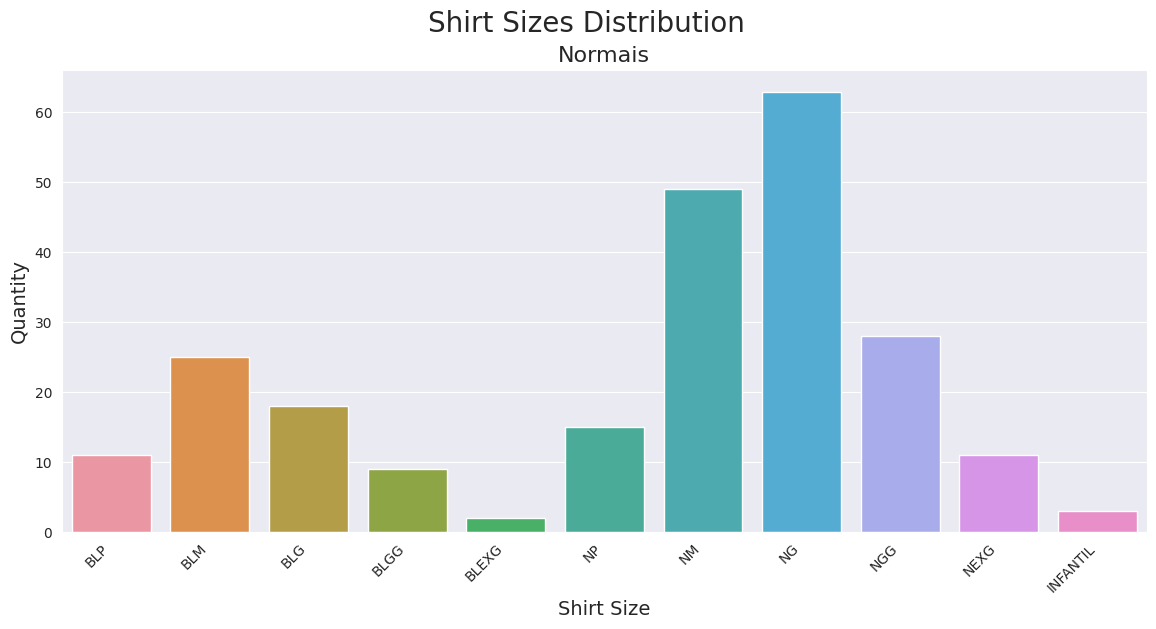


--- 0.6641621589660645 seconds ---


In [15]:
start_time = time.time()

plot_shirt_histogram(calculated_sizes_normais, 'Normais')

print("\n--- %s seconds ---" % (time.time() - start_time))

# FALTANTES - NORMAIS

In [16]:
check_empty_orders(file_path, model='NORMAIS')

Pedidos faltantes:
Linha 2: Barriga
Linha 3: Cotinha
Linha 5: O Grego
Linha 9: Zé Rachado
Linha 11: Pilão
Linha 20: Quiabo*
Linha 21: Baxim
Linha 24: Tartaruga
Linha 26: Britador
Linha 28: Foguete
Linha 30: Zindira*
Linha 33: John Lennon
Linha 36: Laudelinus*
Linha 37: Manikim
Linha 39: Véio*
Linha 46: Inflação
Linha 51: Stillinha
Linha 53: Bibi
Linha 57: Xis
Linha 63: Roliço*
Linha 66: Tôtonto
Linha 81: Numten
Linha 92: Alemão*
Linha 93: Olavo*
Linha 94: Décio*
Linha 95: Mazé
Linha 99: Deusilene
Linha 100: Pardal
Linha 101: Jarbas
Linha 103: Heloísa*
TOTAL: 30


# POLOS

In [17]:
start_time = time.time()

# Example usage to calculate all shirt sizes
file_path = "/content/Camisetas - Doze de 2023.xlsx"  # Replace with the actual path to your Excel file
calculated_sizes_polos = calculate_shirt_sizes(file_path, model='POLOS')

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 0.08659672737121582 seconds ---


In [18]:
start_time = time.time()

get_total_shirts(calculated_sizes_polos)

print("\n--- %s seconds ---" % (time.time() - start_time))

BLP: 1
BLM: 2
BLG: 2
BLGG: 1
BLEXG: 0
NP: 4
NM: 21
NG: 38
NGG: 16
NEXG: 7
INFANTIL: 0
TOTAL: 92

--- 0.010092735290527344 seconds ---


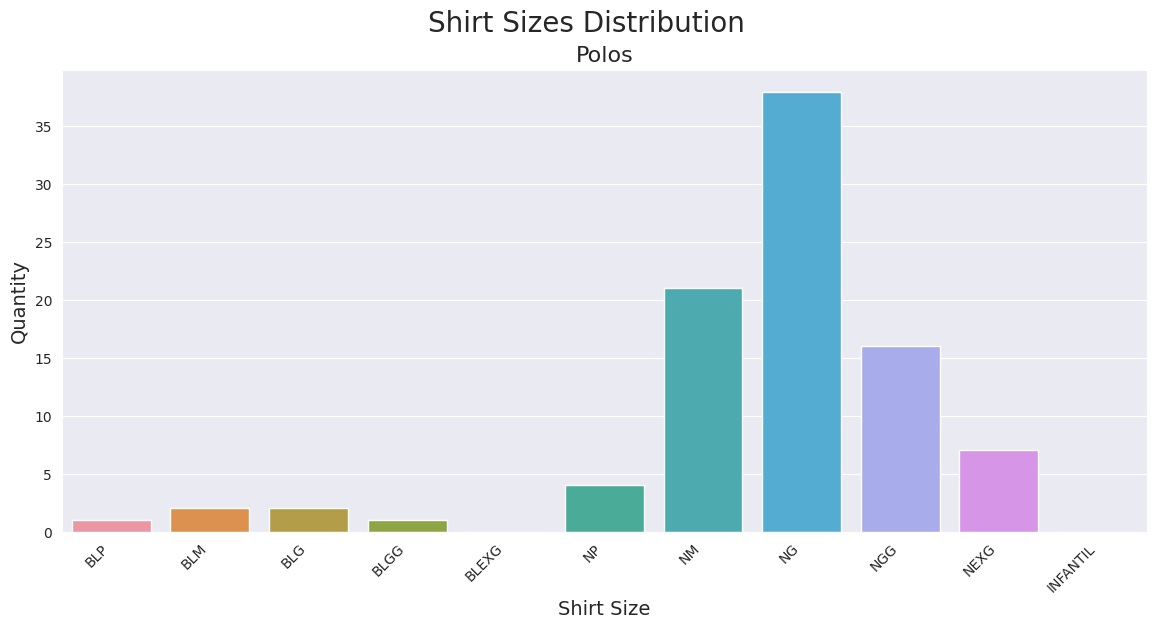


--- 0.5728394985198975 seconds ---


In [19]:
start_time = time.time()

plot_shirt_histogram(calculated_sizes_polos, 'Polos')

print("\n--- %s seconds ---" % (time.time() - start_time))

# FALTANTES - POLOS

In [20]:
check_empty_orders(file_path, model='POLOS')

Pedidos faltantes:
Linha 2: Barriga
Linha 3: Cotinha
Linha 5: O Grego
Linha 9: Zé Rachado
Linha 11: Pilão
Linha 20: Quiabo*
Linha 21: Baxim
Linha 24: Tartaruga
Linha 26: Britador
Linha 28: Foguete
Linha 30: Zindira*
Linha 33: John Lennon
Linha 36: Laudelinus*
Linha 37: Manikim
Linha 39: Véio*
Linha 46: Inflação
Linha 51: Stillinha
Linha 53: Bibi
Linha 57: Xis
Linha 63: Roliço*
Linha 66: Tôtonto
Linha 81: Numten
Linha 92: Alemão*
Linha 93: Olavo*
Linha 94: Décio*
Linha 95: Mazé
Linha 99: Deusilene
Linha 100: Pardal
Linha 101: Jarbas
Linha 103: Heloísa*
TOTAL: 30
